Energy consumption week-1

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jeanmidev/smart-meters-in-london")

print("Path to dataset files:", path)

100%|██████████| 1.17G/1.17G [00:08<00:00, 139MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jeanmidev/smart-meters-in-london/versions/21


In [ ]:
import os

file_list = os.listdir(path)
print(file_list)

# Based on the file names, the 'smart-meters-in-london' directory likely contains the relevant data.
# Let's list the files within this subdirectory.
smart_meters_path = os.path.join(path, 'smart-meters-in-london')
if os.path.isdir(smart_meters_path):
    smart_meters_file_list = os.listdir(smart_meters_path)
    print(smart_meters_file_list)
else:
    print(f"Directory not found: {smart_meters_path}")

# From the listed files, 'daily_dataset.csv' seems most likely to contain daily energy consumption data.
# We will store this path for later use.
daily_dataset_path = os.path.join(smart_meters_path, 'daily_dataset.csv')

['halfhourly_dataset', 'weather_daily_darksky.csv', 'weather_hourly_darksky.csv', 'daily_dataset', 'darksky_parameters_documentation.html', 'daily_dataset.csv', 'informations_households.csv', 'acorn_details.csv', 'uk_bank_holidays.csv', 'hhblock_dataset']
Directory not found: /root/.cache/kagglehub/datasets/jeanmidev/smart-meters-in-london/versions/21/smart-meters-in-london


In [ ]:
# The previous output showed that 'daily_dataset.csv' is directly in the initial 'path' directory.
# We will store this path for later use.
daily_dataset_path = os.path.join(path, 'daily_dataset.csv')

# Verify the identified path
print(f"Identified data file path: {daily_dataset_path}")

Identified data file path: /root/.cache/kagglehub/datasets/jeanmidev/smart-meters-in-london/versions/21/daily_dataset.csv


In [ ]:
import pandas as pd

df_daily = pd.read_csv(daily_dataset_path)
display(df_daily.head())

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066


In [ ]:
display(df_daily.head())
df_daily.info()
print(df_daily.isnull().sum())

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LCLid          object 
 1   day            object 
 2   energy_median  float64
 3   energy_mean    float64
 4   energy_max     float64
 5   energy_count   int64  
 6   energy_std     float64
 7   energy_sum     float64
 8   energy_min     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 241.0+ MB
LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64


In [ ]:
# 1. Analyze the number and percentage of missing values
missing_values = df_daily.isnull().sum()
missing_percentage = (missing_values / len(df_daily)) * 100

print("Missing values count per column:")
print(missing_values)
print("\nMissing values percentage per column:")
print(missing_percentage)

# 2. Determine an appropriate strategy for handling missing values.
# The 'energy_std' column has a relatively small percentage of missing values (around 0.32%).
# For numerical columns with a small percentage of missing values, imputation is a reasonable strategy.
# Given that this is energy consumption data, the mean might be sensitive to outliers,
# so the median is a safer choice for imputation.
# The other columns also have a very small number of missing values, which can also be imputed with the median.
# There are no columns with a significant percentage of missing values that would warrant dropping.

# 3. Implement the chosen strategy
# Impute missing values in the relevant columns with the median of each column.
columns_to_impute = ['energy_median', 'energy_mean', 'energy_max', 'energy_std', 'energy_sum', 'energy_min']
for col in columns_to_impute:
    if missing_values[col] > 0:
        median_value = df_daily[col].median()
        df_daily[col].fillna(median_value, inplace=True)

# Verify that missing values have been handled
print("\nMissing values after imputation:")
print(df_daily.isnull().sum())

Missing values count per column:
LCLid                0
day                  0
energy_median       30
energy_mean         30
energy_max          30
energy_count         0
energy_std       11331
energy_sum          30
energy_min          30
dtype: int64

Missing values percentage per column:
LCLid            0.000000
day              0.000000
energy_median    0.000855
energy_mean      0.000855
energy_max       0.000855
energy_count     0.000000
energy_std       0.322781
energy_sum       0.000855
energy_min       0.000855
dtype: float64


/tmp/ipython-input-81726490.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_daily[col].fillna(median_value, inplace=True)



Missing values after imputation:
LCLid            0
day              0
energy_median    0
energy_mean      0
energy_max       0
energy_count     0
energy_std       0
energy_sum       0
energy_min       0
dtype: int64


In [ ]:
df_daily['day'] = pd.to_datetime(df_daily['day'])
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   LCLid          object        
 1   day            datetime64[ns]
 2   energy_median  float64       
 3   energy_mean    float64       
 4   energy_max     float64       
 5   energy_count   int64         
 6   energy_std     float64       
 7   energy_sum     float64       
 8   energy_min     float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 241.0+ MB


Column: energy_median
  Q1: 0.067, Q3: 0.191, IQR: 0.124
  Lower Bound (1.5*IQR): -0.119
  Upper Bound (1.5*IQR): 0.377
  Number of potential outliers: 226075
  Percentage of potential outliers: 6.4401%

Column: energy_mean
  Q1: 0.0980833333333333, Q3: 0.2624583333333333, IQR: 0.164375
  Lower Bound (1.5*IQR): -0.1484791666666667
  Upper Bound (1.5*IQR): 0.5090208333333333
  Number of potential outliers: 202069
  Percentage of potential outliers: 5.7562%

Column: energy_max
  Q1: 0.346, Q3: 1.128, IQR: 0.7819999999999999
  Lower Bound (1.5*IQR): -0.8269999999999998
  Upper Bound (1.5*IQR): 2.3009999999999997
  Number of potential outliers: 121627
  Percentage of potential outliers: 3.4647%

Column: energy_std
  Q1: 0.0692890920718538, Q3: 0.2288590795230589, IQR: 0.1595699874512051
  Lower Bound (1.5*IQR): -0.17006588910495385
  Upper Bound (1.5*IQR): 0.46821406069986654
  Number of potential outliers: 159596
  Percentage of potential outliers: 4.5463%

Column: energy_sum
  Q1: 4.682,

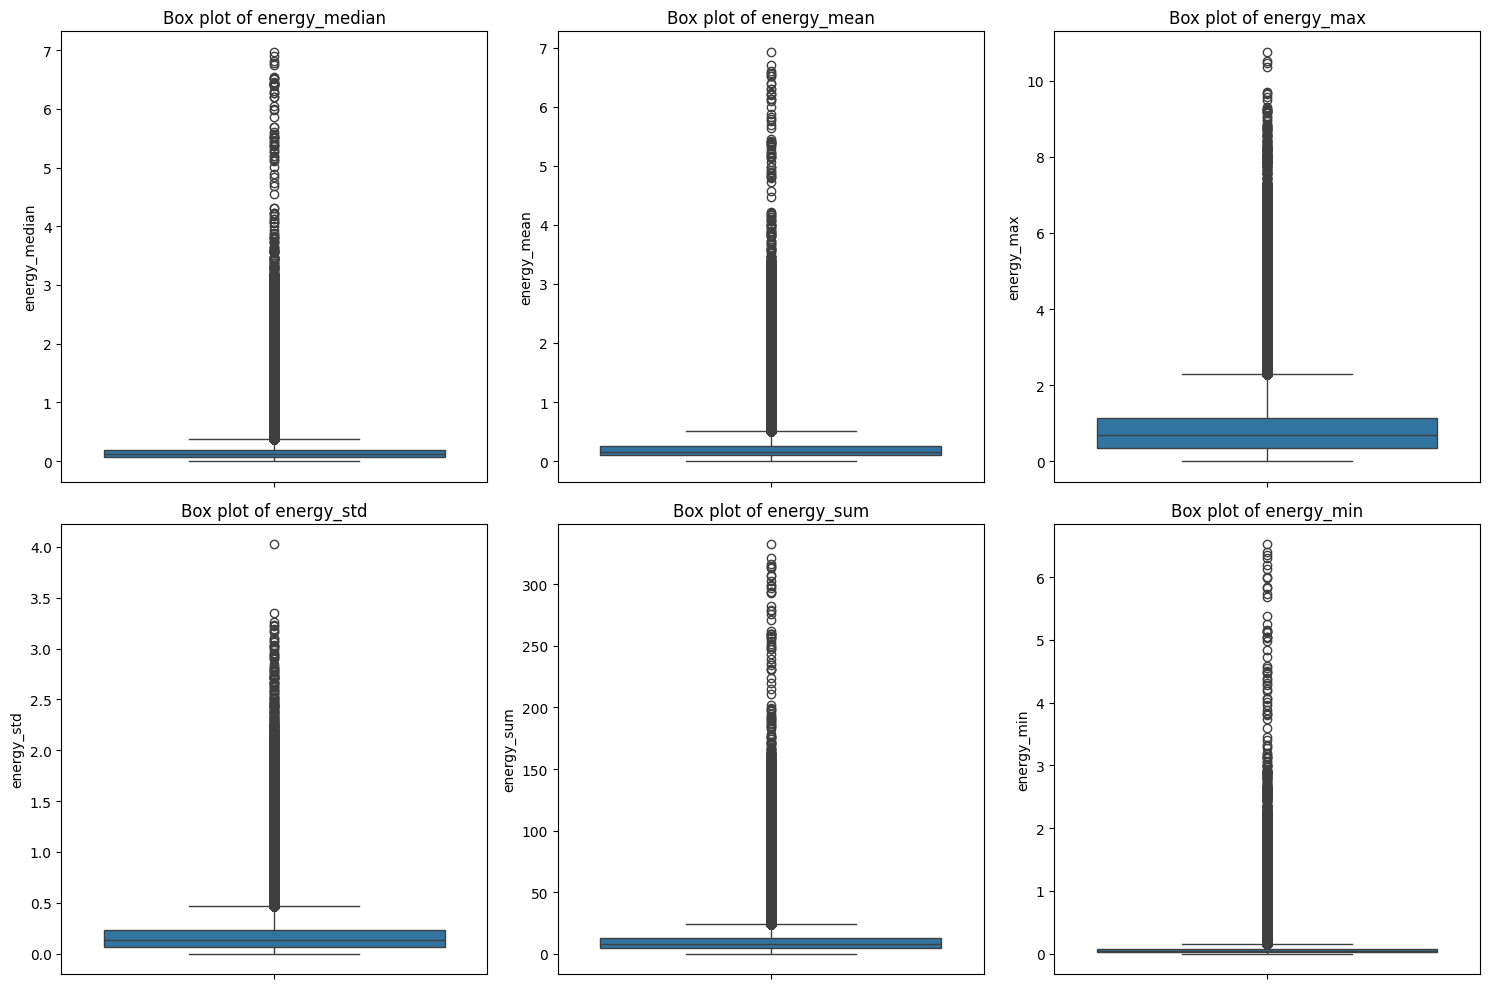

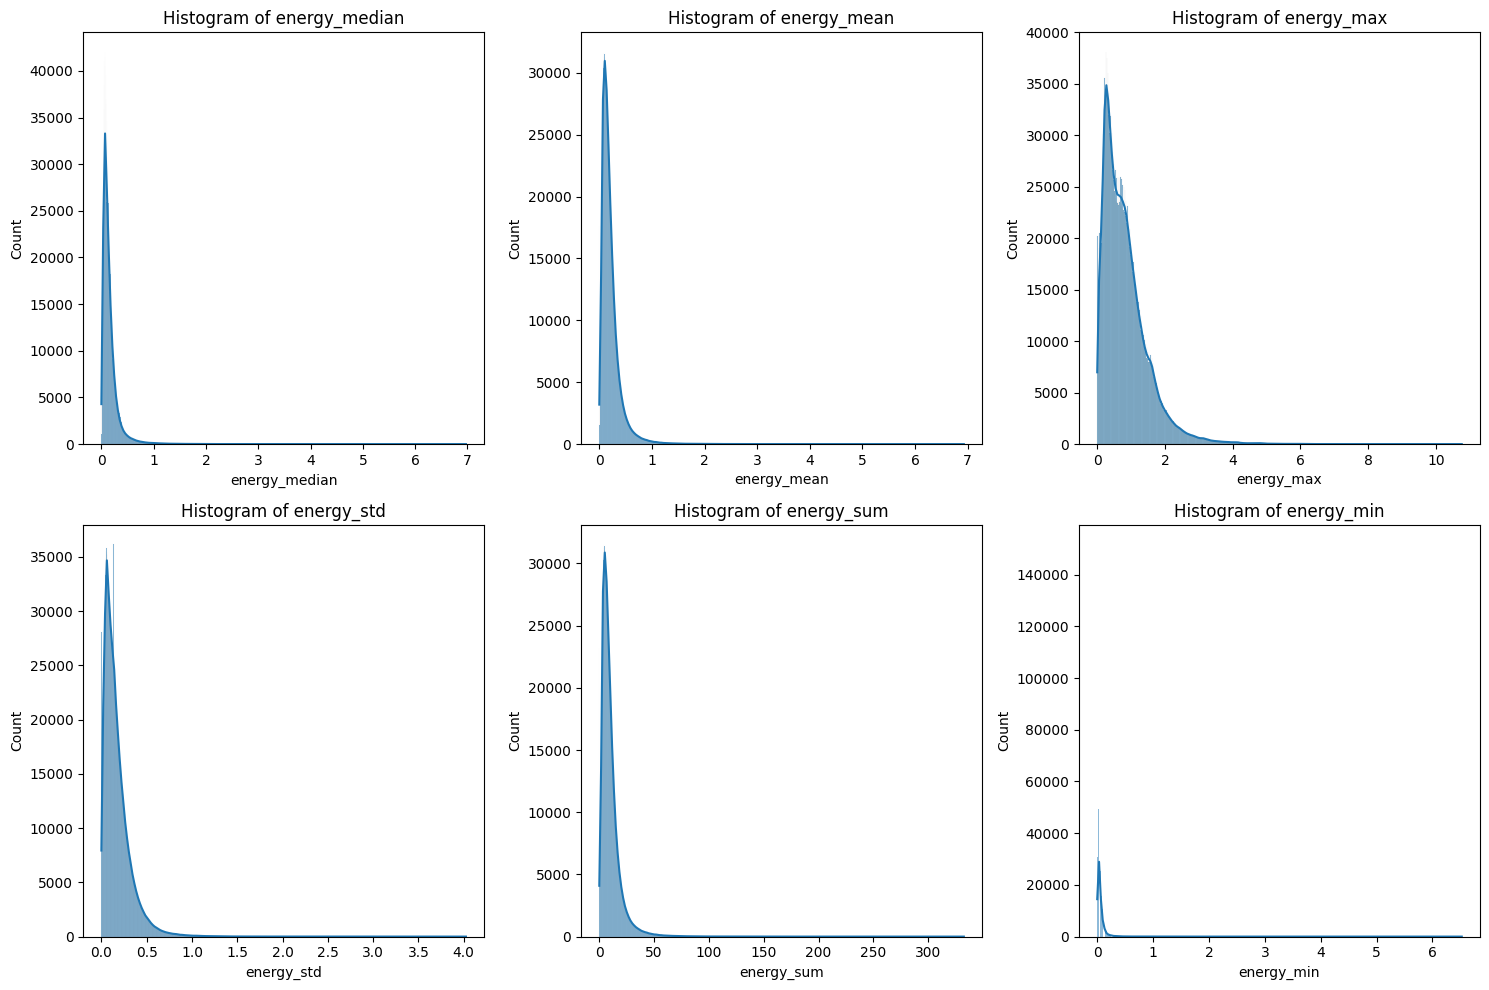

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Relevant numerical columns
numerical_cols = ['energy_median', 'energy_mean', 'energy_max', 'energy_std', 'energy_sum', 'energy_min']

# Calculate IQR and define bounds
outlier_bounds = {}
for col in numerical_cols:
    Q1 = df_daily[col].quantile(0.25)
    Q3 = df_daily[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[col] = (lower_bound, upper_bound)
    print(f"Column: {col}")
    print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"  Lower Bound (1.5*IQR): {lower_bound}")
    print(f"  Upper Bound (1.5*IQR): {upper_bound}")

    # Identify potential outliers
    outliers = df_daily[(df_daily[col] < lower_bound) | (df_daily[col] > upper_bound)]
    print(f"  Number of potential outliers: {len(outliers)}")
    print(f"  Percentage of potential outliers: {len(outliers) / len(df_daily) * 100:.4f}%\n")

# Visualize distributions to analyze outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_daily[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_daily[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Checking for outliers after capping:
Column: energy_median, Number of potential outliers after capping: 0
Column: energy_mean, Number of potential outliers after capping: 0
Column: energy_max, Number of potential outliers after capping: 0
Column: energy_std, Number of potential outliers after capping: 0
Column: energy_sum, Number of potential outliers after capping: 0
Column: energy_min, Number of potential outliers after capping: 0


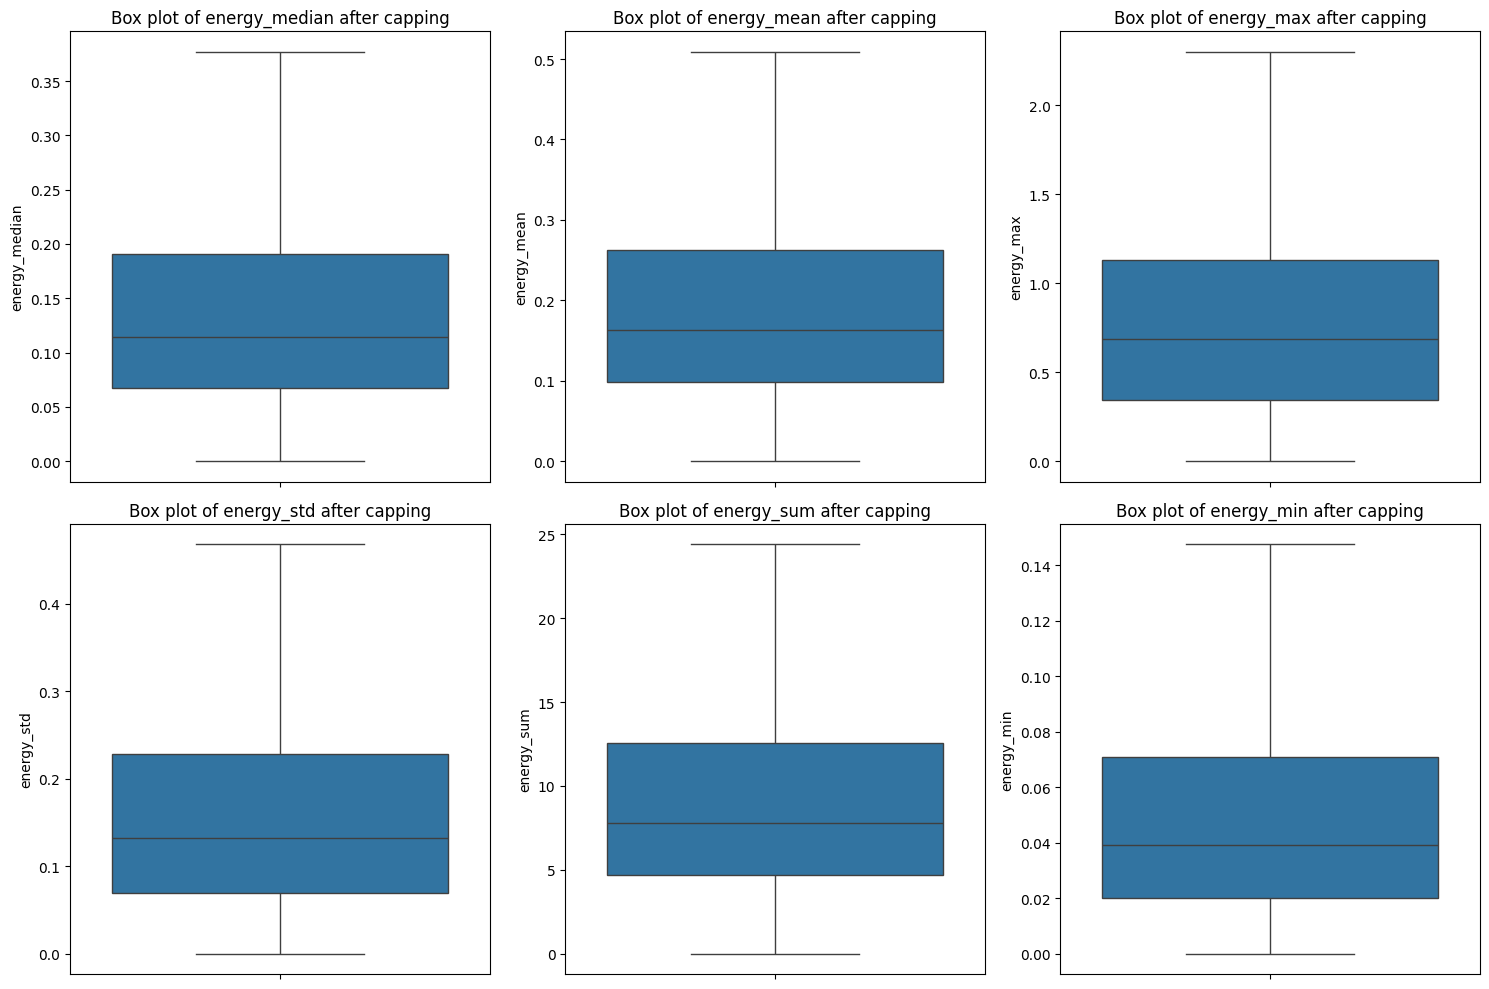

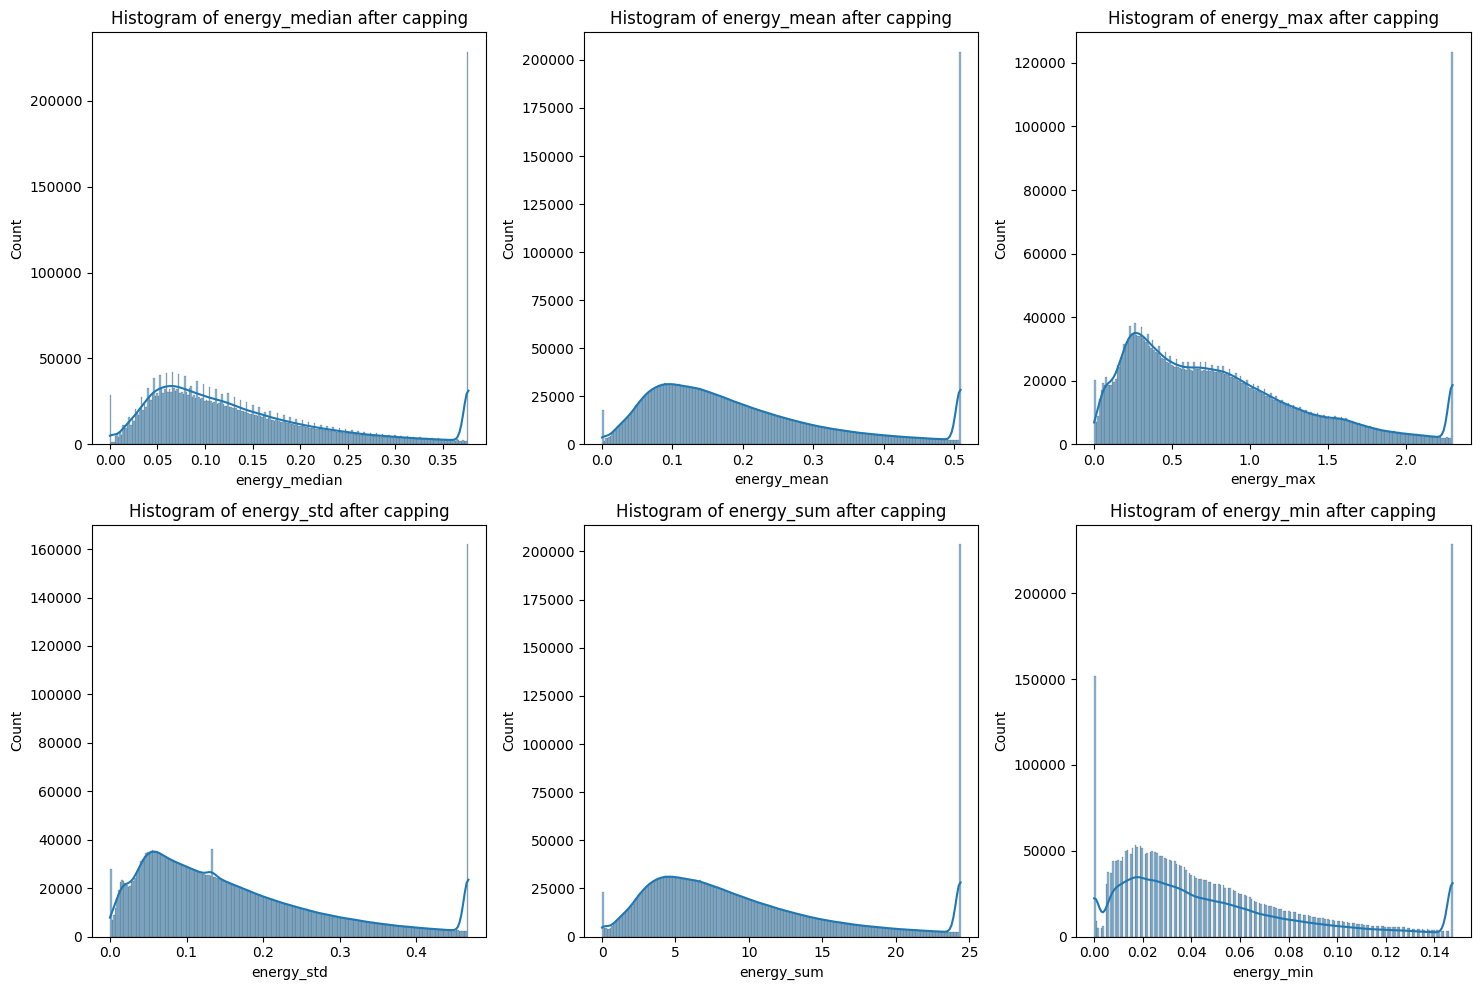

In [ ]:
# Implement the chosen outlier handling strategy: capping the outliers to the upper bound
for col in numerical_cols:
    lower_bound, upper_bound = outlier_bounds[col]
    # Capping the upper outliers
    df_daily[col] = np.where(df_daily[col] > upper_bound, upper_bound, df_daily[col])
    # Capping the lower outliers (although less common for energy consumption, good practice)
    df_daily[col] = np.where(df_daily[col] < lower_bound, lower_bound, df_daily[col])

# Verify that outliers have been handled by re-checking the bounds
print("Checking for outliers after capping:")
for col in numerical_cols:
    lower_bound, upper_bound = outlier_bounds[col]
    outliers_after = df_daily[(df_daily[col] < lower_bound) | (df_daily[col] > upper_bound)]
    print(f"Column: {col}, Number of potential outliers after capping: {len(outliers_after)}")

# Visualize the distributions again after capping
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_daily[col])
    plt.title(f'Box plot of {col} after capping')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_daily[col], kde=True)
    plt.title(f'Histogram of {col} after capping')
plt.tight_layout()
plt.show()

In [ ]:
# Extract year, month, day of the week, and day of the year
df_daily['year'] = df_daily['day'].dt.year
df_daily['month'] = df_daily['day'].dt.month
df_daily['day_of_week'] = df_daily['day'].dt.dayofweek
df_daily['day_of_year'] = df_daily['day'].dt.dayofyear

# Display the first few rows with the new features
display(df_daily.head())

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,year,month,day_of_week,day_of_year
0,MAC000131,2011-12-15,0.3770,0.432045,0.868,22,0.239146,9.505,0.072,2011,12,3,349
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48,0.281471,14.216,0.031,2011,12,4,350
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48,0.188405,9.111,0.064,2011,12,5,351
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48,0.202919,10.511,0.065,2011,12,6,352
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48,0.259205,15.647,0.066,2011,12,0,353


In [ ]:
from sklearn.preprocessing import StandardScaler

# 1. Identify the numerical columns that need scaling.
# Exclude 'year', 'month', 'day_of_week', 'day_of_year' as they are cyclical/categorical representations.
numerical_cols_to_scale = ['energy_median', 'energy_mean', 'energy_max', 'energy_std', 'energy_sum', 'energy_min']

# 2. Choose and instantiate StandardScaler.
# StandardScaler is chosen because it scales features to have a mean of 0 and a standard deviation of 1,
# which is suitable for many machine learning algorithms.
scaler = StandardScaler()

# 3. Apply the scaler to the selected numerical columns.
df_daily[numerical_cols_to_scale] = scaler.fit_transform(df_daily[numerical_cols_to_scale])

# 4. Display the first few rows and descriptive statistics of the scaled columns.
display(df_daily.head())
display(df_daily[numerical_cols_to_scale].describe())

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,year,month,day_of_week,day_of_year
0,MAC000131,2011-12-15,2.362485,1.805492,0.101921,22,0.612146,0.016623,0.516321,2011,12,3,349
1,MAC000131,2011-12-16,-0.005081,0.763730,0.531578,48,0.958558,0.768815,-0.486698,2011,12,4,350
2,MAC000131,2011-12-17,-0.407215,-0.051670,-0.215123,48,0.196858,-0.046285,0.320610,2011,12,5,351
3,MAC000131,2011-12-18,-0.281548,0.171946,-0.230715,48,0.315652,0.177249,0.345074,2011,12,6,352
4,MAC000131,2011-12-19,0.492560,0.992298,-0.036677,48,0.776320,0.997299,0.369538,2011,12,0,353


,energy_median,energy_mean,energy_max,energy_std,energy_sum,energy_min
count,3.510433e+06,3.510433e+06,3.510433e+06,3.510433e+06,3.510433e+06,3.510433e+06
mean,1.254417e-15,-1.715391e-15,9.097711e-16,-1.840787e-16,6.151286e-16,6.651965e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.427631e+00,-1.506933e+00,-1.401874e+00,-1.345132e+00,-1.501012e+00,-1.245079e+00
25%,-7.540560e-01,-7.549438e-01,-8.024351e-01,-7.780387e-01,-7.534508e-01,-7.558012e-01
50%,-2.765216e-01,-2.550016e-01,-2.099257e-01,-2.583102e-01,-2.532139e-01,-2.909873e-01
75%,4.925603e-01,5.052938e-01,5.523671e-01,5.279551e-01,5.058434e-01,4.918572e-01
max,2.362485e+00,2.395650e+00,2.584571e+00,2.486946e+00,2.394785e+00,2.363345e+00


In [ ]:
import os

# Define a path and filename for the output CSV file
# We'll save it in a 'processed' directory within the original data path
processed_dir = os.path.join(path, 'processed')
os.makedirs(processed_dir, exist_ok=True) # Create the directory if it doesn't exist
processed_data_path = os.path.join(processed_dir, 'processed_daily_dataset.csv')

# Save the df_daily DataFrame to the specified path
df_daily.to_csv(processed_data_path, index=False)

# Print a confirmation message
print(f"Cleaned and processed data saved to: {processed_data_path}")

Cleaned and processed data saved to: /root/.cache/kagglehub/datasets/jeanmidev/smart-meters-in-london/versions/21/processed/processed_daily_dataset.csv


week-2

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df_daily.drop(['LCLid', 'day', 'energy_sum'], axis=1)
y = df_daily['energy_sum']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2808346, 10)
Shape of X_test: (702087, 10)
Shape of y_train: (2808346,)
Shape of y_test: (702087,)


## Feature selection


Select the features (independent variables) and the target variable (dependent variable) for the model.


In [ ]:
# Identify feature columns (excluding 'LCLid', 'day', and the target 'energy_sum')
feature_cols = ['energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_min', 'year', 'month', 'day_of_week', 'day_of_year']

# Assign feature columns to X
X = df_daily[feature_cols]

# Assign the target column to y
y = df_daily['energy_sum']

# Display the first few rows of X and y to verify the selection
display(X.head())
display(y.head())

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_min,year,month,day_of_week,day_of_year
0,2.362485,1.805492,0.101921,22,0.612146,0.516321,2011,12,3,349
1,-0.005081,0.763730,0.531578,48,0.958558,-0.486698,2011,12,4,350
2,-0.407215,-0.051670,-0.215123,48,0.196858,0.320610,2011,12,5,351
3,-0.281548,0.171946,-0.230715,48,0.315652,0.345074,2011,12,6,352
4,0.492560,0.992298,-0.036677,48,0.776320,0.369538,2011,12,0,353


,energy_sum
0,0.016623
1,0.768815
2,-0.046285
3,0.177249
4,0.997299


## Model selection and training


Choose a suitable machine learning model and train it using the training data.


In [ ]:
from sklearn.linear_model import LinearRegression

# Instantiate the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

## Prediction


Use the trained model to make predictions on the test data.


In [ ]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Display the first few predicted values
print("First 10 predicted energy_sum values:")
print(y_pred[:10])

First 10 predicted energy_sum values:
[ 1.77815926 -1.23488376 -0.20467134  0.05203776 -0.46328695 -0.32543906
 -0.92919189 -0.61556485  0.01670021 -1.19086612]


## Model evaluation

Evaluate the performance of the model using appropriate metrics, such as accuracy, and compare the predicted values with the actual values.


Mean Squared Error (MSE): 0.0034
R-squared (R2) Score: 0.9966


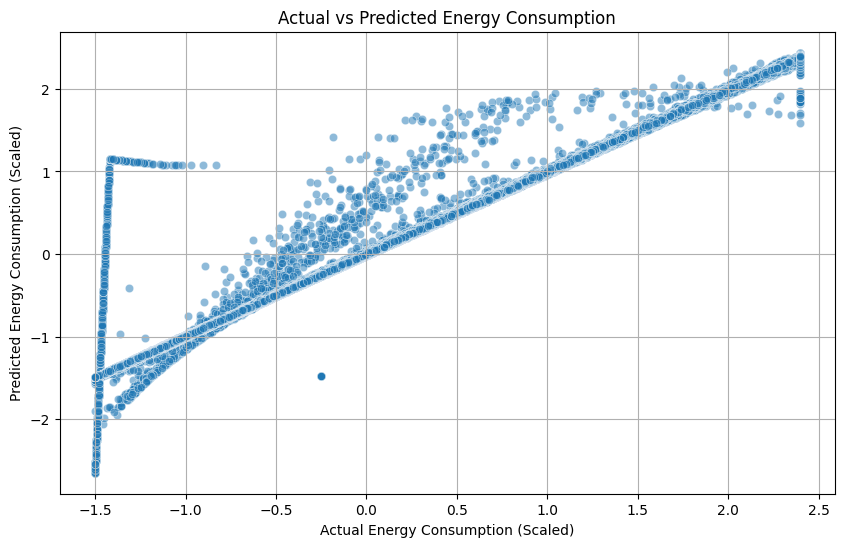

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# Print the calculated MSE and R2 score
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

# Create a scatter plot to visualize actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.title('Actual vs Predicted Energy Consumption')
plt.xlabel('Actual Energy Consumption (Scaled)')
plt.ylabel('Predicted Energy Consumption (Scaled)')
plt.grid(True)
plt.show()